In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import os
import sys
root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

dagger_training = False
self_training = False
model_structure_scenario = "sum_after_embed_14_scenarios"

if self_training:
    dagger_training = True

f = []
unfeas_info = []
log = []
n_iter = 1
for i in range(n_iter):
    if self_training:
        f.append(np.load(root_folder+'/decision_transformer/saved_files/checkpoints/checkpoint_ff_ctgrtg_self_' + str(i) + '/log.npz', allow_pickle=True))
        unfeas_info.append({'i_unfeas_scp_cvx' : f[i]['i_unfeas_scp_cvx'], 'i_unfeas_self' : f[i]['i_unfeas_self']})
    else:
        if dagger_training:
            f.append(np.load(root_folder+'/decision_transformer/saved_files/checkpoints/checkpoint_ff_ctgrtg_art_cl_' + str(i) + '/log.npz', allow_pickle=True))
            #f.append(np.load(root_folder+'/decision_transformer/saved_files/checkpoints/checkpoint_ff_ctgrtg_v02_cl_0/log.npz', allow_pickle=True))
            #unfeas_info.append({'i_unfeas_scp_cvx' : f[i]['i_unfeas_scp_cvx'], 'i_unfeas_self' : f[i]['i_unfeas_self']})
        else:
            f.append(np.load(root_folder+f'/decision_transformer/saved_files/checkpoints_{model_structure_scenario}/checkpoint_ff_obs_ctgrtg/log.npz', allow_pickle=True))
    log.append(f[i]['log'].item())

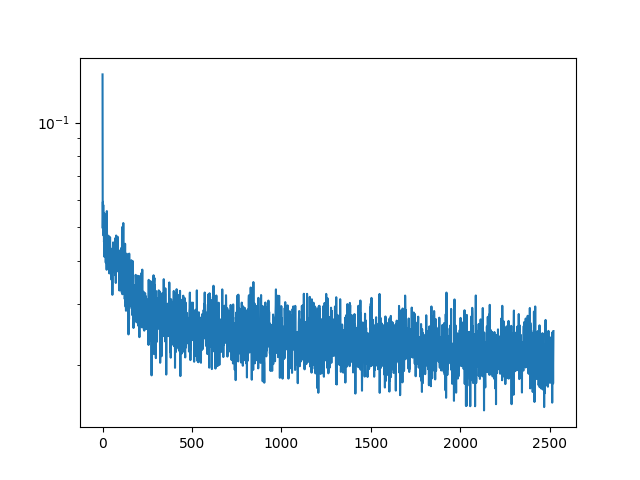

In [2]:
plt.figure()
for i in range(n_iter):
    if dagger_training:
        plt.plot(np.arange(0,51)+i*50,log[i]['loss_ol'])
    else:
        plt.plot(log[i]['loss'])
        plt.yscale('log')

KeyError: 'loss_cl'

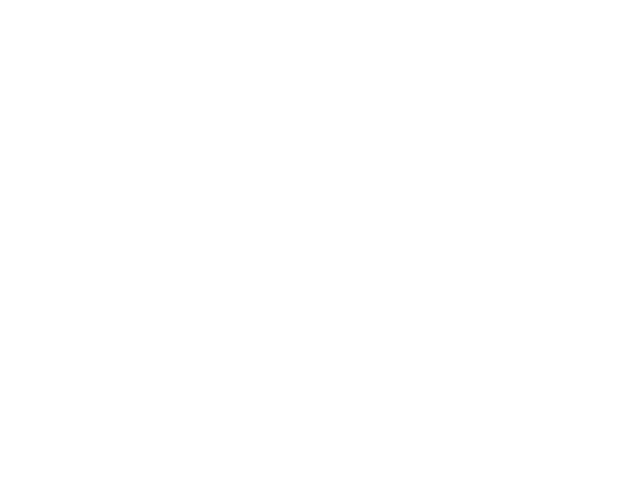

In [3]:
plt.figure()
for i in range(n_iter):
    plt.plot(np.arange(0,51)+i*50,log[i]['loss_cl'])

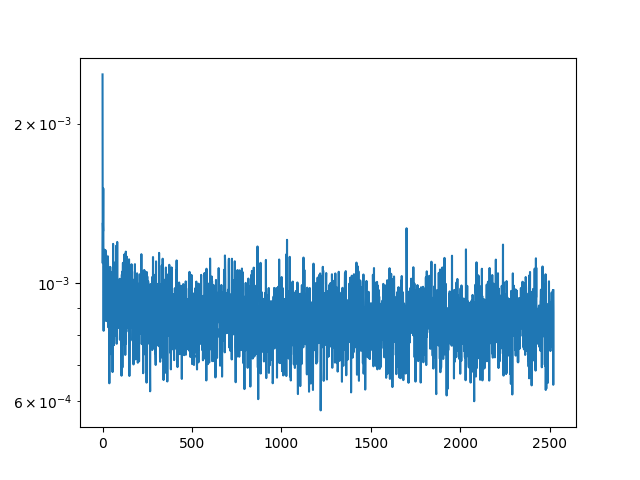

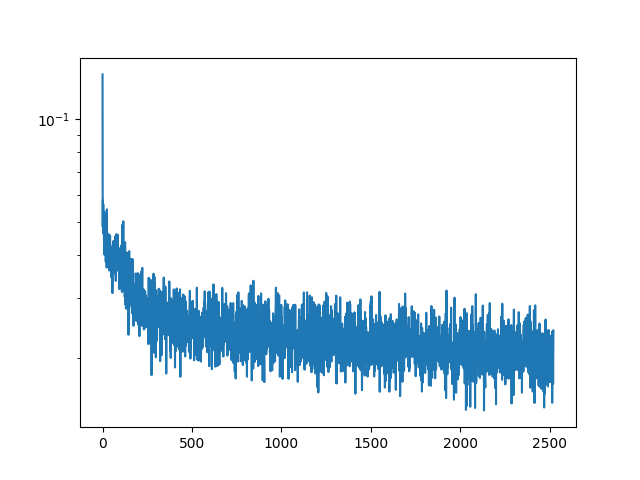

In [4]:
plt.figure()
for i in range(n_iter):
    if dagger_training:
        plt.plot(np.arange(0,51)+i*50,log[i]['loss_state_cl'])
    else:
        plt.plot(log[i]['loss_state'])
        plt.yscale('log')

plt.figure()
for i in range(n_iter):
    if dagger_training:
        plt.plot(np.arange(0,51)+i*50,log[i]['loss_action_cl'])
    else:
        plt.plot(log[i]['loss_action'])
        plt.yscale('log')

In [14]:
if self_training:
    plt.figure()
    for i in range(n_iter):
        plt.scatter(i,len(unfeas_info[i]['i_unfeas_self']))

In [15]:
dataset = []
dataset.append(np.load(root_folder+'/optimization/saved_files/closed_loop/checkpoint_ff_obs_ctgrtg.npz'))
for i in range(n_iter-1):
    dataset.append(np.load(root_folder+'/optimization/saved_files/closed_loop/dagger_checkpoint_ff_ctgrtg_cl_' + str(i) + '.npz'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/amir/freeflyer2/ff_control/transformer_controller/optimization/saved_files/closed_loop/checkpoint_ff_obs_ctgrtg.npz'

In [ ]:
dataset[0]

In [ ]:
for i in range(n_iter):
    print('DAGGER_ITERATION', str(i), ': Dataset dimension', len(dataset[i]['dataset_ix']))

In [ ]:
for i in range(n_iter):
    print('DAGGER_ITERATION', str(i), ': Number of cvx infeasible', len(dataset[i]['i_unfeas_cvx']))
    print('DAGGER_ITERATION', str(i), ': Number of closed loop infeasible', len(dataset[i]['i_unfeas_artMPC']))

In [ ]:
dataset[0]['dataset_ix'][dataset[0]['i_unfeas_artMPC'][0]],
dataset[0]['J_cvx'][dataset[0]['i_unfeas_artMPC'][0]]

In [ ]:
j = 0
i_dag = 1
plt.figure()
plt.plot(dataset[i_dag]['target_action'][j,:,0].T)
plt.plot(dataset[i_dag]['context_action'][j,:,0].T)

plt.figure()
plt.plot(dataset[i_dag]['target_action'][j,:,1].T)
plt.plot(dataset[i_dag]['context_action'][j,:,1].T)

plt.figure()
plt.plot(dataset[i_dag]['target_action'][j,:,2].T)
plt.plot(dataset[i_dag]['context_action'][j,:,2].T)

In [ ]:
dataset[i_dag]['target_action'][j,:,0]
